# Welcome to the Dark Art of Coding:
## Introduction to Python
graphing with matplotlib

<img src='../images/dark_art_logo.600px.png' width='300' style="float:right">

# Prerequisites:

* pandas
* matplotlib
* numpy

IF you don't already have these installed in your virtual environment, **activate your virtualenv** and **conda install** them:

```bash
conda install pandas numpy matplotlib
```

In [ ]:
# generate a horizontal bar chart
# (based on an example from the matplotlib website...)
# http://matplotlib.org/1.2.1/examples/pylab_examples/barh_demo.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# we'll use pandas to read in some data, but we'll only keep one of the columns

df = pd.read_csv('../universal_datasets/log_file.csv', names=['name',
                                                  'email',
                                                  'fmip',
                                                  'toip',
                                                  'date',
                                                  'lat',
                                                  'long',
                                                  'payload'],
                                            usecols=['name'])

In [24]:
# to generate this graph, we are gonna make up
# a set of random numbers between 
# 42 and 48.5

In [25]:
# NOTE:
#     0) the function len(df) returns the number of rows in df
#     1) np.random.rand yields numbers between [0 and 1].
#

df['fan_rating'] = 42 + 6.5 * np.random.rand(len(df))

In [26]:
df

,name,fan_rating
0,barry allen,45.826457
1,barbara gordon,44.831572
2,kyle rayner,44.400826
3,dinah lance,47.516717
4,arthur curry,42.966105
5,kara zor-el,47.212457
6,kara zor-el,47.921201
7,hal jordan,46.081912
8,kara zor-el,46.600265
9,john constantine,45.034924


In [27]:
# as a first step, let's clean up the data by dropping
# duplicate rows using these rules/parameters:
#     0) check whether there is a duplicate in a given column
#     1) keep only the last value of any duplicates
#        (default is to take the first)
#     2) replace the dataframe with our new deduplicated version

In [28]:
df.drop_duplicates(subset='name', inplace=True, keep='last')


In [29]:
df

,name,fan_rating
0,barry allen,45.826457
1,barbara gordon,44.831572
2,kyle rayner,44.400826
3,dinah lance,47.516717
4,arthur curry,42.966105
7,hal jordan,46.081912
8,kara zor-el,46.600265
9,john constantine,45.034924


In [9]:
# let's convert the content of the name column from
# first & last to just first name
# we do this by generating a function to do 
# the conversion on a single value

In [30]:
def fname_only(full_name):
    # change
    fname = full_name.split(' ')[0]
    return fname

In [31]:
# the map() function associated with dataframe columns maps
# the named function against
# every item in every row of the given column
# NOTE:
#     Remember, pandas has several ways to refer to columns:
#     0) when creating a new column, you must use bracket
#        syntax: df['<colname>']
#     1) to refer to an existing column, you are free to use either
#        bracket syntax OR dot notation syntax: df.<colname>
#        I find the dot notation easier to type, so defer
#        to it when possible

In [32]:
df['fname'] = df['name'].map(fname_only)

In [33]:
df

,name,fan_rating,fname
0,barry allen,45.826457,barry
1,barbara gordon,44.831572,barbara
2,kyle rayner,44.400826,kyle
3,dinah lance,47.516717,dinah
4,arthur curry,42.966105,arthur
7,hal jordan,46.081912,hal
8,kara zor-el,46.600265,kara
9,john constantine,45.034924,john


In [14]:
# lastly, let's extract just the values out of
#     the fname column.
# this is a list-like object and will be used 
#     as the names for our horizontal bars later.

In [34]:
people = df['fname'].values

In [35]:
type(people)

numpy.ndarray

In [36]:
people

array(['barry', 'barbara', 'kyle', 'dinah', 'arthur', 'hal', 'kara',
       'john'], dtype=object)

In [37]:
# now we can put together a sequence that will
# store the y position values. we'll use np.arange to
# create an array of sequential values based on
# the length of the people array
# this will be used as a set of temporary names
# for our horizontal bars...
# ultimately, we will replace it with real names...

# plus, we will save off the fan rating as a series for use
# in the plotting software as the x values

In [38]:
y_pos = np.arange(len(people))

performance = df['fan_rating']

In [39]:
# based on this preliminary work, we can generate a
# simple horizontal bar chart
# we give it y values and x values
# and we tell it to show() the plot

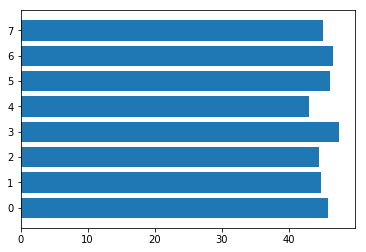

In [40]:
plt.barh(y_pos, performance)
plt.show()

In [41]:
# presume we don't like the alignment of the names
# against the horizontal bars.
# we can align the names to the center of the bars.

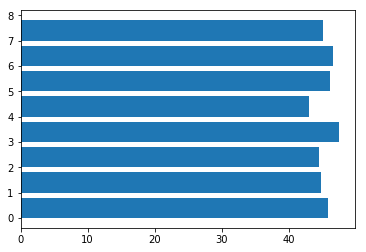

In [42]:
plt.barh(y_pos, performance, align='edge')
plt.show()

In [43]:
# what if we don't like the dark color? we can revise the color to have a
# greater degree of transparency by setting the alpha characteristic

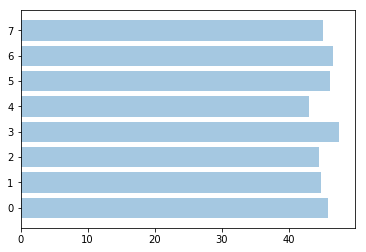

In [44]:
plt.barh(y_pos, performance, alpha=0.4)
plt.show()

In [45]:
# what if we don't like the default color? 
# we can revise the color as desired
# matplotlib has a number of default colors:
#     'r' stands for red

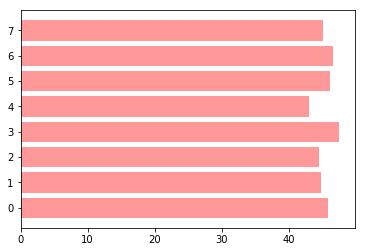

In [46]:
plt.barh(y_pos, performance, align='center', alpha=0.4, color='r')
plt.show()

In [47]:
# what if our data comes with some percentage of error?
# this can be represented using an xerr parameter.
# here, we again use random to generate a random 
# set of values that we can
# then use to generate error bars. 
# in real life, you would have some
# margin for error for all the values.

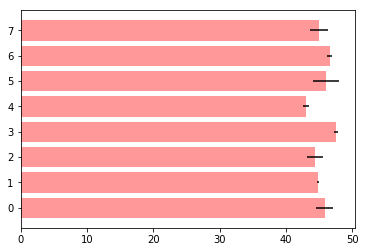

In [48]:
error = 2 * np.random.rand(len(people))

plt.barh(y_pos, performance, xerr=error, 
        align='center', alpha=0.4, color='r')
plt.show()

In [49]:
# this still leaves off info that most of us
# would want, in terms of the
# people names, title, axis labels, etc.

Text(0.5, 1.0, "Estimated Justice League's Fan Ratings")

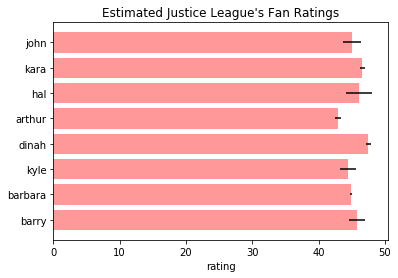

In [50]:
plt.barh(y_pos, performance, xerr=error, 
         align='center', alpha=0.4, color='r')

plt.yticks(y_pos, people)
plt.xlabel('rating')
plt.title("Estimated Justice League's Fan Ratings")


In [51]:
plt.savefig('hbar.png')
plt.show()

<Figure size 432x288 with 0 Axes>

In [52]:
# creating a histogram with some additional features
# (based heavily on an example from the matplotlib website...)
# http://matplotlib.org/1.2.1/examples/api/histogram_demo.html

# In addition to the basic histogram, this demo shows a few optional
# features:
#     * setting the number of data bins
#     * the ''normed'' flag, which normalizes bin heights so that the
#       integral of the histogram is 1. the resulting histogram is a
#       probability density
#     * setting the face color of the bars
#     * setting the opacity (alpha value)

# As always, we start by importing the appropriate libraries

In [53]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [54]:
# we define some of the characteristics of our distribution:
mu = 100       # mean of the distribution
sigma = 15     # standard deviation of the distribution

In [55]:
# np.random.randn creates a random array of values taken from a
# standard normal distribution
# we can transform the distribution by multiplying the values by sigma and
# by adding the mean mu

In [56]:
x = mu + sigma * np.random.randn(10000)
print(x)

[133.13811785  63.77985645  89.22665449 ...  86.19067799  98.21351691
  95.61678308]


In [57]:
# we set a specific number of bins that we will group our values into...

In [58]:
num_bins = 50

In [59]:
# next we create the data for the histogram
# n = values (height) for each bar of the histogram
# bins = the indicators that demarck the bins
# patches = are the rectangle objects that represent each bar

[1.43162006e-04 4.77206688e-05 3.34044681e-04 3.34044681e-04
 7.63530700e-04 5.72648025e-04 8.58972038e-04 1.86110608e-03
 2.81551946e-03 2.86324013e-03 3.72221216e-03 5.63103891e-03
 7.15810031e-03 8.44655837e-03 1.03553851e-02 1.19778879e-02
 1.45070833e-02 1.67499547e-02 1.74657648e-02 2.05676082e-02
 2.36217310e-02 2.48624684e-02 2.61986471e-02 2.61509265e-02
 2.71053399e-02 2.49101891e-02 2.77257085e-02 2.26195970e-02
 2.22378316e-02 2.10448149e-02 1.75134854e-02 1.69408374e-02
 1.53660553e-02 1.25028152e-02 7.73074834e-03 8.54199971e-03
 6.53773162e-03 5.48787691e-03 3.34044681e-03 2.81551946e-03
 1.95654742e-03 1.28845806e-03 1.28845806e-03 7.63530700e-04
 3.81765350e-04 2.86324013e-04 4.29486019e-04 1.90882675e-04
 9.54413375e-05 9.54413375e-05]
[ 48.93794685  51.0334749   53.12900295  55.224531    57.32005906
  59.41558711  61.51111516  63.60664321  65.70217126  67.79769931
  69.89322736  71.98875542  74.08428347  76.17981152  78.27533957
  80.37086762  82.46639567  84.5619237

/opt/tljh/user/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


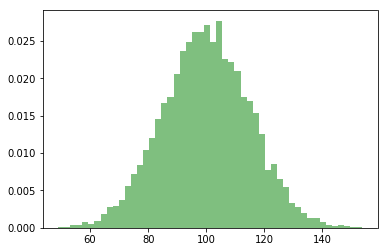

In [60]:
n, bins, patches = plt.hist(x, num_bins, normed=1,
                            facecolor='green', alpha=0.5)
print(n)
print(bins)
# print(patches)
# for item in patches:
#     print(item)

plt.show()

In [61]:
# from here, we can add a 'best fit' line...
# the normal probability density function (pdf) helps to answer the question:
# "how common are samples at a given value?'

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


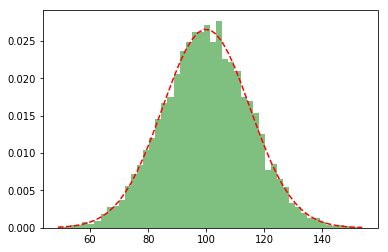

In [62]:
n, bins, patches = plt.hist(x, num_bins,
                            normed=1, 
                            facecolor='green',
                            alpha=0.5)

y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')

plt.show()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


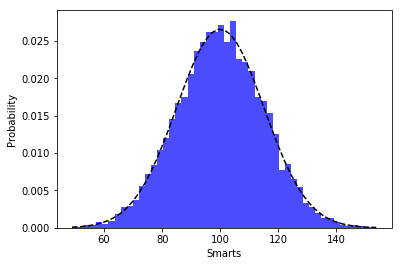

In [63]:
# And let's add some labels...

n, bins, patches = plt.hist(x, num_bins, normed=1,
                            facecolor='blue', alpha=0.7)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'k--')

plt.xlabel('Smarts')
plt.ylabel('Probability')

plt.show()

In [64]:
# the opening '$\' and the closing '$' tags in the following commands enable you to
# include italics in the title

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  This is separate from the ipykernel package so we can avoid doing imports until


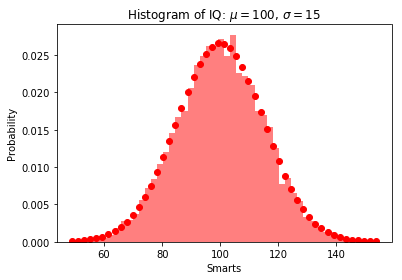

In [65]:
n, bins, patches = plt.hist(x, num_bins, normed=1,
                            facecolor='red', alpha=0.5)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'ro')
plt.xlabel('Smarts')
plt.ylabel('Probability')

plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

plt.show()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  This is separate from the ipykernel package so we can avoid doing imports until


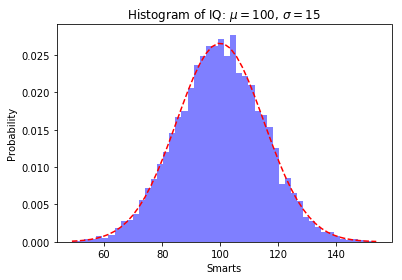

<Figure size 432x288 with 0 Axes>

In [66]:
n, bins, patches = plt.hist(x, num_bins, normed=1,
                            facecolor='blue', alpha=0.5)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

plt.show()

plt.savefig('hist.png')

In [67]:
# generate a scatter plot
# (based heavily on an example from the matplotlib website...)
# http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
# Let's read in a csv via pandas but keep only two of the columns

In [75]:
df = pd.read_csv('../universal_datasets/log_file_1000.csv', names=['name',
                                                   'email',
                                                   'fmip',
                                                   'toip',
                                                   'date',
                                                   'lat',
                                                   'long',
                                                   'payload'],
                                            nrows=35,
                                            usecols=['lat', 'long'])

In [76]:
# next, let's create two arrays from the lat and long columns

In [77]:
df

,lat,long
0,49.83160,8.01485
1,45.10327,11.68293
2,47.11673,10.35874
3,46.75616,11.47886
4,48.59134,12.30683
5,45.23082,10.90642
6,48.20129,10.54183
7,48.85730,9.23887
8,48.05990,9.97774
9,46.43865,8.50877


In [78]:
latitudes = df['lat']
longitudes = df['long']

In [79]:
# here we calculate the length of one of the arrays

count = len(latitudes)

In [80]:
# we'll use numpy to create a random collections of numbers for use in defining colors
# of the circles in our scatterplot

In [81]:
colors = np.random.rand(count)

In [82]:
# this step creates a random set of areas based on a radiuses from 0 to 20
# we can imagine that this is indicative of a the frequency of communications OR
# something similarly awesome and nerdy like that.
# np.pi gives us pi to 15 decimal places
# np.random.rand gives us random numbers from 0 to 1

In [83]:
areas = np.pi * (20 * np.random.rand(count))**2

In [84]:
# generate the scatter plot

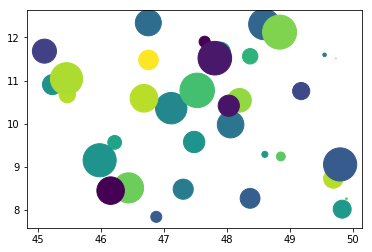

In [85]:
plt.scatter(latitudes, longitudes, s=areas, c=colors) #, alpha=0.4)

In [86]:
# we chose to create stand alone variables (latitude, longitude) but these are not
# required... we can just as happily read in directly from df.lat or df.long:
# plt.scatter(df.lat, df.long, s=area, c=colors, alpha=0.4)

In [89]:
plt.savefig('scatter.png')
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.savefig?